In [33]:
import csv
import numpy as np
import os
import glob
import h5py
import cPickle as pickle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
csv.register_dialect("textdialect", delimiter='\t')
%matplotlib inline

##Get a large file with image data inside

Walk through all directories, save 
- image data: 224x224 of uint8
- info about image: idx --> filename, date, emb/medium/plates, tag
- info about books: id --> title, author, pubplace, date

In [56]:
# Initialize data storage ONLY ONCE
image_data = h5py.File('../data/image_data.hdf5','w')
image_metadata = {}
book_metadata = {}
image_to_idx = {}

In [58]:
DIRIMAGE = "D:/ArtHistoryNet/images_postproc_256/"
TSV_DIREC = "D:/ArtHistoryNet/data/imagedirectory/imagedirectory-master"

logfile = open("D:/ArtHistoryNet/analysis/could_not_find.txt", 'w')

img_counter = 0

image_dataset = None
temp = None
for fn in glob.glob(TSV_DIREC + "/*.tsv"):
    if 'unknown' in fn: continue
        
    with open(fn, 'r') as ifile:
        reader = csv.reader(ifile, 'textdialect')
        header = reader.next()
        
        #0 is volume, 4 is BL_DLS_ID(not used), 6 is book identifier, 8 is date, 10 is image_idx, 11 is page, 12 is flickr_id
        for row in reader:
            if img_counter % 1000 == 0: print img_counter
                
            # build the image filename from information about the image
            file_prefix = row[6].zfill(9) + '_' + row[0] + '_' + row[11].zfill(6) + '_' + row[10] + '_'
            if 'small' in fn: dir1 = 'embellishments'
            elif 'medium' in fn: dir1 = 'medium'
            elif 'plates' in fn: dir1 = 'plates'
            impath = DIRIMAGE + dir1 + '/' + str(row[8]) + '/' + file_prefix
            
            # see if the image exists
            imgs = glob.glob(impath + "*")
            if len(imgs) != 1: 
                logfile.write(impath + '\n')
                continue  # we couldn't find the file
            
            # add image to hdf5 file
            try: im = Image.open(imgs[0], 'r')
            except: 
                logfile.write("Could not open: {}\n".format(impath))
                continue

            im = im.resize((224, 224), Image.BICUBIC)
            x = np.asarray(im).astype('uint8')
            if img_counter % 5000 == 0:
                if img_counter > 0:
                    image_data.create_dataset("Chunk{}".format(img_counter/5000 - 1), data=temp, dtype='uint8')
                temp = np.zeros((5000,224,224,1))
            temp[img_counter % 5000] = np.transpose([x], (1,2,0))
            
            # info about image: idx --> filename, date, emb/medium/plates  (e,m,p), tag
            image_metadata[img_counter] = [file_prefix, row[8], dir1[0], "None"]
            image_to_idx[file_prefix] = img_counter  # file_prefix --> index
            img_counter += 1
            
            # info about book: title, author, pubplace, date
            book_id = row[6]
            if book_id not in book_metadata:
                book_metadata[book_id] = [row[2], row[3], row[5], row[8]]

image_data.create_dataset("Chunk{}".format(img_counter/5000 + 1), data=temp, dtype='uint8')  # fencepost
logfile.close()

0
1000
2000
3000
4000
4000
5000
5000
6000
7000
8000
9000
9000
10000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
36000
36000
36000
36000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
14

In [59]:
# Close h5py file objects
image_data.close()

In [60]:
image_metadata


{0: ['002938347_0_000009_1_', '1510', 'e', 'None'],
 1: ['002938347_0_000006_1_', '1510', 'e', 'None'],
 2: ['002938347_0_000009_2_', '1510', 'e', 'None'],
 3: ['002938347_0_000005_1_', '1510', 'e', 'None'],
 4: ['002938347_0_000051_1_', '1510', 'e', 'None'],
 5: ['002938347_0_000049_1_', '1510', 'e', 'None'],
 6: ['000840022_0_000009_1_', '1528', 'p', 'None'],
 7: ['000840022_0_000008_1_', '1528', 'p', 'None'],
 8: ['000840022_0_000009_1_', '1528', 'p', 'None'],
 9: ['000840022_0_000008_1_', '1528', 'p', 'None'],
 10: ['000840022_0_000027_1_', '1528', 'e', 'None'],
 11: ['000840022_0_000011_1_', '1528', 'e', 'None'],
 12: ['000840022_0_000004_1_', '1528', 'e', 'None'],
 13: ['001442148_0_000173_1_', '1540', 'e', 'None'],
 14: ['001442148_0_000036_1_', '1540', 'e', 'None'],
 15: ['001442148_0_000018_1_', '1540', 'e', 'None'],
 16: ['001442148_0_000113_1_', '1540', 'e', 'None'],
 17: ['001442148_0_000175_1_', '1540', 'e', 'None'],
 18: ['001442148_0_000144_1_', '1540', 'e', 'None'],
 19

In [61]:
book_metadata

{'000909147': ['Diplomatarium Christierni Primi. Samling af Aktstykker, Diplomer og Breve, henho\xcc\x88rende til Kong Christiern den Fo\xcc\x88rstes Historie. Ved Registrator Hans Knudsen ... Udgivet af C. F. Wegener',
  'KNUDSEN, Hans Registrar of the Danish Royal Archives',
  'Kjo\xcc\x88benhavn',
  '1856'],
 '001196857': ['A History of Old Middlesbrough',
  'FALLOWS, W.',
  'Newcastle-upon-Tyne',
  '1861'],
 '000991588': ['A travers le vieux Saint-Brieuc. Souvenirs et monuments ... Illustrations de P. Chardin, etc. [With a biographical sketch of the author by A. de la Borderie.]',
  'DU BOIS DE LA VILLERABEL, Arthur Viscount',
  'Saint-Brieuc',
  '1891'],
 '002701790': ['Old Gumtree Lyrics. By a Daughter of South Australia. With illustrations',
  '',
  "pp. 36. Frearson's Printing House: Adelaide, 1897",
  '1897'],
 '000282774': ['Bergens borgerbog, 1550-1751. Udgiven ... af N. Nicolaysen. (bd. 2. 1752-1865. Utgit av Bergens Historiske Forening ved B. E. Bendixen og A. M. Wiesener.

In [62]:
image_to_idx

{'002270696_0_000024_1_': 521995,
 '000744317_03_000239_2_': 182528,
 '002483175_09_000298_1_': 351311,
 '000459452_05_000382_1_': 109329,
 '003055019_02_000065_1_': 270101,
 '001997988_0_000319_1_': 23943,
 '003157844_0_000187_1_': 125798,
 '003626852_0_000592_1_': 632775,
 '003567317_09_000729_1_': 823531,
 '002819694_01_000578_2_': 185445,
 '001968594_0_000363_1_': 393676,
 '002126093_0_000047_1_': 786810,
 '002715813_0_000340_1_': 53960,
 '002668463_02_000377_1_': 412856,
 '001967527_0_000423_1_': 320113,
 '002364436_0_000775_1_': 272009,
 '003529115_04_000399_1_': 112616,
 '000443745_0_000205_1_': 657434,
 '001564165_02_000554_1_': 886680,
 '003024426_0_000060_1_': 964500,
 '000890311_02_000479_1_': 808107,
 '000931556_0_000672_1_': 105535,
 '000517253_0_000104_1_': 807198,
 '001544493_0_000010_1_': 345909,
 '003112345_0_000168_1_': 875287,
 '002706361_0_001153_1_': 779915,
 '001529131_0_000288_2_': 189226,
 '001414094_0_000057_1_': 922019,
 '001384296_0_000214_1_': 863185,
 '0013

In [63]:
pickle.dump((image_metadata, book_metadata, image_to_idx), open("../data/all_metadata.pkl", 'w'))

In [64]:
(a,b,c) = pickle.load(open("../data/all_metadata.pkl", 'r'))

In [73]:
len(a.keys())

970218

In [52]:
image_data = h5py.File('../data/image_data.hdf5','r')

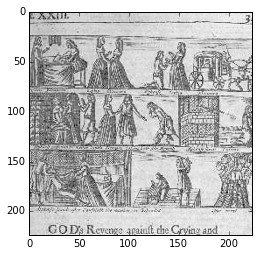

In [45]:
plt.imshow(image_data["Chunk0"][2301][:,:,0], cmap = cm.Greys_r)

In [49]:
image_data["Chunk0"][[239,994,2039]].shape

(3L, 224L, 224L, 1L)

In [21]:
tagged_data = "D:/ArtHistoryNet/analysis/20160228_image_to_manual_tags.csv"
outfile = "D:/ArtHistoryNet/data/tags_manual.txt"
data = {}  # file_prefix --> [tag, date] We can search for file_prefix --> index later
with open(tagged_data, 'r') as ifile, open(outfile, 'w') as ofile:
    for line in ifile:
        row = line.split('| ')
        if len(row) < 2: continue
        name = row[0].split('|')[1]
        year = int(name.split('.jpg')[0][-4:])
        file_prefix = '_'.join(name.split('_')[:4]) + '_'
        tag = row[1].rstrip()
        data[file_prefix] = [tag, year]

In [24]:
data

{'001102875_03_000244_1_': ['Seals', 1899],
 '000082783_0_000113_1_': ['Text', 1884],
 '003827942_01_000305_1_': ['People', 1892],
 '000890311_02_000381_1_': ['Objects', 1895],
 '000550576_02_000013_1_': ['Seals', 1843],
 '003064962_0_000053_1_': ['Miniatures', 1899],
 '001269510_0_000045_1_': ['Seals', 1890],
 '002284306_0_000226_1_': ['Miniatures', 1892],
 '001913884_03_000204_1_': ['Landscape', 1890],
 '002304978_01_000007_1_': ['Seals', 1890],
 '001425348_0_000056_1_': ['Animals', 1888],
 '002583258_0_000029_2_': ['Miniatures', 1890],
 '001765236_03_000708_1_': ['Objects', 1891],
 '003848708_0_000008_1_': ['Architecture', 1890],
 '000586465_0_000159_1_': ['People', 1843],
 '000100280_02_000006_1_': ['Seals', 1879],
 '001638031_0_000941_1_': ['Landscape', 1896],
 '003115493_0_000467_1_': ['Text', 1891],
 '000883132_0_000339_1_': ['Maps', 1888],
 '001634702_0_000026_1_': ['Animals', 1899],
 '000353244_02_000013_1_': ['Animals', 1892],
 '002326471_0_000053_1_': ['Maps', 1890],
 '00275